<a href="https://colab.research.google.com/github/ILPATHERA/ML2_Pokemoncreator/blob/main/ML2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Machine Learning 2 Image Classification Model

## Introduction

Welcome to this Jupyter Notebook, which focuses on the classification of Pokémon images using a machine learning model. In this project, we will utilize a Pokémon dataset to train an image classification model. The trained model will then be used to classify new Pokémon images.


## Dataset: Pokémon Images

Our dataset consists of a variety of Pokémon images, with each image associated with a specific Pokémon. The goal is to create a model capable of identifying these Pokémon based on their visual characteristics. We will divide the dataset into training and testing sets.

### Import Libraries

I could have included all imports which were used in one cell. However, since I like to be able to see in the respective cell which import is needed, I will import this in the respective cell.

### Load Data

I found the dataset on Kaggle. To use this directly, we need the API of Kaggle. In my GitHub repository there is a file called kaggle.json. Download it and upload it below.

Upload kaggle.json

In [132]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"simoneantoniosommer","key":"ccbbebbff4f40fa13f5b9024966cb78c"}'}

Setup Kaggle API

In [133]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 75 Jun  8 18:06 kaggle.json
/content


Giving permission to file

In [134]:
!chmod 600 ~/.kaggle/kaggle.json

Now we check the connection to Kaggle. If the following is a list of datasets, then the connection to the Kaggle API has succeeded.

In [135]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          28105        787  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2201         61  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4707         96  1.0              
mohithsairamreddy/salary-data 

Now the dataset "pokemon-images-and-types" is downloaded, unzipped and saved to the current working directory of the Jupyter notebook. This dataset contains images of Pokémon along with their type information.

This is the dataset we will use in this Jupyter Notebook.

In [136]:
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types --force
!unzip /content/pokemon-images-and-types.zip


 81% 2.00M/2.47M [00:01<00:00, 2.13MB/s]
100% 2.47M/2.47M [00:01<00:00, 2.21MB/s]
Archive:  /content/pokemon-images-and-types.zip
replace images/images/abomasnow.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/images/abomasnow.png  
  inflating: images/images/abra.png  
  inflating: images/images/absol.png  
  inflating: images/images/accelgor.png  
  inflating: images/images/aegislash-blade.png  
  inflating: images/images/aerodactyl.png  
  inflating: images/images/aggron.png  
  inflating: images/images/aipom.png  
  inflating: images/images/alakazam.png  
  inflating: images/images/alomomola.png  
  inflating: images/images/altaria.png  
  inflating: images/images/amaura.png  
  inflating: images/images/ambipom.png  
  inflating: images/images/amoonguss.png  
  inflating: images/images/ampharos.png  
  inflating: images/images/anorith.png  
  inflating: images/images/araquanid.jpg  
  inflating: images/images/arbok.png  
  inflating: images/images/arcanine.png  
  

Our dataset consists of a CSV file and a folder with the images in JPG and PNG format. So that we can connect this accordingly, we add a column to the DF and deposit the respective path of the image.

In [137]:
import pandas as pd
from PIL import Image
from IPython.display import display
import os


#Create df
df = pd.read_csv('/content/pokemon.csv')

# Path to the images
image_folder = '/content/images/images'

# Create a dictionary to map image names to their corresponding paths
image_dict = {}
for file in os.listdir(image_folder):
    image_dict[os.path.splitext(file)[0]] = os.path.join(image_folder, file)

# Create a new column for the image path in the DataFrame
df['image_path'] = df['Name'].map(image_dict)

# Display the DataFrame
df.head()
#df.tail()


,Name,Type1,Type2,image_path
0,bulbasaur,Grass,Poison,/content/images/images/bulbasaur.png
1,ivysaur,Grass,Poison,/content/images/images/ivysaur.png
2,venusaur,Grass,Poison,/content/images/images/venusaur.png
3,charmander,Fire,NaN,/content/images/images/charmander.png
4,charmeleon,Fire,NaN,/content/images/images/charmeleon.png


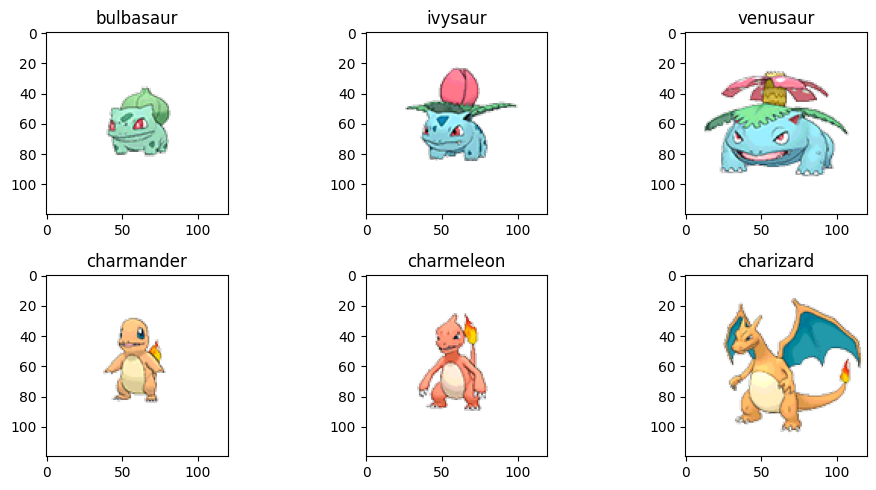

In [138]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Pfad zum Bild
image_folder = '/content/images/images'

# DataFrame erstellen (annimm, dass du bereits den DataFrame 'df' hast)

# Die ersten 6 Einträge im DataFrame auswählen
df_subset = df.head(6)

# Anzahl der Zeilen und Spalten für den Plot festlegen
num_rows = (len(df_subset) - 1) // 3 + 1
num_cols = min(len(df_subset), 3)

# Subplots erstellen
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Iteriere über die Einträge und zeige die Bilder an
for i, ax in enumerate(axes.flat):
    if i < len(df_subset):
        image_name = df_subset.loc[i, 'Name']
        image_path = f'{image_folder}/{image_name}.png'

        # Bild laden
        img = mpimg.imread(image_path)

        # Bild im Plot anzeigen
        ax.imshow(img)
        ax.set_title(image_name)
      

plt.tight_layout()
plt.show()


Now, I would like to perform a detailed examination of my dataset. First and foremost, I want to determine the total number of entries and the number of columns present in the dataset. This information will provide an overview of the dataset's size and structure, allowing me to gain insights into its dimensions. Additionally, I am interested in identifying the names of all the columns in the dataset, which will help me understand the specific variables and attributes captured by the dataset.

In [139]:
# Determine the number of entries and columns in the dataset
num_entries = len(df)
num_columns = len(df.columns)
columns = df.columns
# Print the results
print("Number of entries:", num_entries)
print("Number of columns:", num_columns)
print("Colums:", columns)


Number of entries: 809
Number of columns: 4
Colums: Index(['Name', 'Type1', 'Type2', 'image_path'], dtype='object')


With the following function I now check if there are empty fields in my dataset. 


In [140]:
missing_values = df.isnull().sum()
print(missing_values)


Name            0
Type1           0
Type2         404
image_path      0
dtype: int64


Based on this value, I see that 404 fields are missing in the column "Type 2". After analyzing the mentioned fields, I see that this is not relevant, because there are Pokemons that do not necessarily have 2 types.

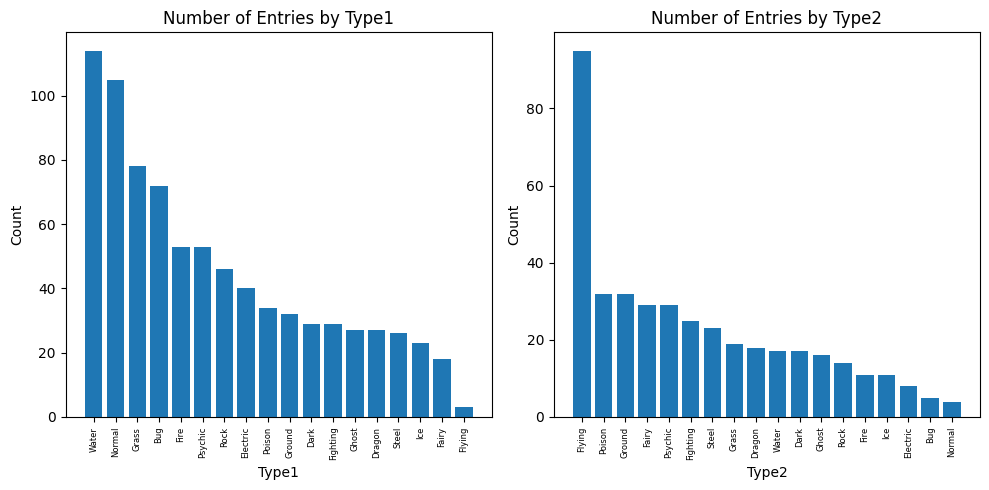

In [141]:
# Liste der Spaltennamen, für die Balkendiagramme erstellt werden sollen
columns = ['Type1', 'Type2']

# Anzahl der Subplots basierend auf der Anzahl der Spalten
num_subplots = len(columns)

# Anpassung der Größe der Subplots je nach Anzahl der Subplots
fig, axes = plt.subplots(1, num_subplots, figsize=(10, 5))

# Loop über die Spalten und erstelle Balkendiagramme
for i, column in enumerate(columns):
    # Zähle die Häufigkeit jedes Typs in der Spalte
    counts = df[column].value_counts()
    
    # Erstelle das Balkendiagramm
    ax = axes[i]
    ax.bar(counts.index, counts.values)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Number of Entries by {column}')
    ax.tick_params(axis='x', rotation=90, labelsize=6)
    
# Subplots anpassen
plt.tight_layout()

# Diagramme anzeigen
plt.show()

### Transforming the Data

Now I will extend the CSV table by creating a column for all types. If the class applies, a 1 is filled in and if not a 0. 

In [142]:
poke_type = []
code = []

for i in range(df.shape[0]):
    if (df.iloc[i]['Type1'] == 'Grass') or (df.iloc[i]['Type2'] == 'Grass'):
        poke_type.append('Grass')
        code.append(1)
    elif (df.iloc[i]['Type1'] == 'Water') or (df.iloc[i]['Type2'] == 'Water'):
        poke_type.append('Water')
        code.append(2)
    elif (df.iloc[i]['Type1'] == 'Fire') or (df.iloc[i]['Type2'] == 'Fire'):
        poke_type.append('Fire')
        code.append(3)
    elif (df.iloc[i]['Type1'] == 'Rock') or (df.iloc[i]['Type2'] == 'Rock'):
        poke_type.append('Rock')
        code.append(4)
    elif (df.iloc[i]['Type1'] == 'Poison') or (df.iloc[i]['Type2'] == 'Poison'):
        poke_type.append('Poison')
        code.append(5)
    elif (df.iloc[i]['Type1'] == 'Ground') or (df.iloc[i]['Type2'] == 'Ground'):
        poke_type.append('Ground')
        code.append(6)
    elif (df.iloc[i]['Type1'] == 'Steel') or (df.iloc[i]['Type2'] == 'Steel'):
        poke_type.append('Steel')
        code.append(7)
    elif (df.iloc[i]['Type1'] == 'Electric') or (df.iloc[i]['Type2'] == 'Electric'):
        poke_type.append('Electric')
        code.append(8)
    elif (df.iloc[i]['Type1'] == 'Ice') or (df.iloc[i]['Type2'] == 'Ice'):
        poke_type.append('Ice')
        code.append(9)
    elif (df.iloc[i]['Type1'] == 'Dark') or (df.iloc[i]['Type2'] == 'Dark'):
        poke_type.append('Dark')
        code.append(10)
    elif (df.iloc[i]['Type1'] == 'Flying') or (df.iloc[i]['Type2'] == 'Flying'):
        poke_type.append('Flying')
        code.append(11)
    elif (df.iloc[i]['Type1'] == 'Bug') or (df.iloc[i]['Type2'] == 'Bug'):
        poke_type.append('Bug')
        code.append(12)
    elif (df.iloc[i]['Type1'] == 'Fighting') or (df.iloc[i]['Type2'] == 'Fighting'):
        poke_type.append('Fighting')
        code.append(13)
    elif (df.iloc[i]['Type1'] == 'Psychic') or (df.iloc[i]['Type2'] == 'Psychic'):
        poke_type.append('Psychic')
        code.append(14)
    elif (df.iloc[i]['Type1'] == 'Ghost') or (df.iloc[i]['Type2'] == 'Ghost'):
        poke_type.append('Ghost')
        code.append(15)
    elif (df.iloc[i]['Type1'] == 'Dragon') or (df.iloc[i]['Type2'] == 'Dragon'):
        poke_type.append('Dragon')
        code.append(16)
    elif (df.iloc[i]['Type1'] == 'Fairy') or (df.iloc[i]['Type2'] == 'Fairy'):
        poke_type.append('Fairy')
        code.append(17)
    else:
        poke_type.append('NaN')
        code.append('NaN')




Format the new dataframe:

In [143]:
#Create new df
pokedf=df

#Create new column for the type
pokedf['type'] = poke_type
pokedf['code'] = code

#Drop old columns and Type NaN
pokedf = pokedf.drop(['Type1', 'Type2', 'Name'], axis=1)

#Check for missing values
missing_values = pokedf.isnull().sum()
print(missing_values)
#new_df = new_df[new_df['type']!='NaN']

pokedf.head()

image_path    0
type          0
code          0
dtype: int64


,image_path,type,code
0,/content/images/images/bulbasaur.png,Grass,1
1,/content/images/images/ivysaur.png,Grass,1
2,/content/images/images/venusaur.png,Grass,1
3,/content/images/images/charmander.png,Fire,3
4,/content/images/images/charmeleon.png,Fire,3


In addition, a column is created for the values with "NaN" this, as well as Type1 and type2 I drop at this point, since these are no longer used.

### Creating Custom Dataset and DataLoading

In [144]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Lade die Bilder und erstelle das Trainingsset
train_images = []
train_labels = []
for i in tqdm(range(df.shape[0])):
    file_path = df['image_path'][i]
    if os.path.exists(file_path):
        img = load_img(file_path, target_size=(224, 224))  # Optional: Ändere die Größe der Bilder
        img = img_to_array(img)
        img = img / 255
        train_images.append(img)
        label = df['code'][i]  # Verwende die 'code'-Spalte als Label
        train_labels.append(label)

# Aufteilen in Trainings-, Validierungs- und Testsets
X_train, X_temp, y_train, y_temp = train_test_split(np.array(train_images), np.array(train_labels), test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 10% von X_temp für Validierung, 10% für Test


  0%|          | 0/809 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 809/809 [00:00<00:00, 1097.98it/s]


## Visualizing the Results

In [145]:
print("TrainingSet: ", X_train.shape, y_train.shape)
print("ValidationSet: ", X_val.shape, y_val.shape)
print("TestSet: ", X_test.shape, y_test.shape)

TrainingSet:  (647, 224, 224, 3) (647,)
ValidationSet:  (141, 224, 224, 3) (141,)
TestSet:  (21, 224, 224, 3) (21,)


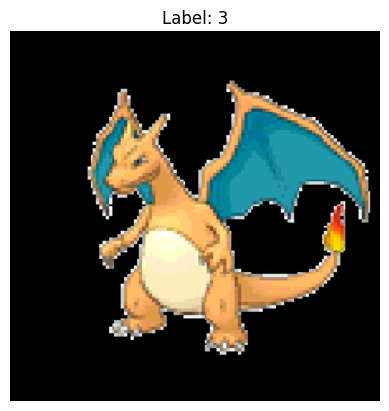

In [146]:
index = 345   # Index of image 345 for Glurak 
image = X_train[index]
label = y_train[index]

#convert to the format of before
image = (image * 255).astype(np.uint8)

# Zeige das Bild an
plt.imshow(image)
plt.title("Label: " + str(label))
plt.axis("off")
plt.show()


## Model

Lets create a Model

In [147]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

train_generator = train_datagenerator.flow_from_dataframe(
    pokedf, 
    x_col='image_path', 
    y_col='type',
    target_size=(224, 224), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    pokedf , 
    x_col='image_path',
    y_col='type',
    target_size=(224, 224),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 729 validated image filenames belonging to 18 classes.
Found 80 validated image filenames belonging to 18 classes.


In [154]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras import layers

model = keras.models.Sequential()

model.add(layers.Dense(4, input_shape=(224, 224, 4)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(18, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [155]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 224, 224, 4)       20        
                                                                 
 conv2d_18 (Conv2D)          (None, 222, 222, 64)      2368      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 256)      

In [156]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') is not None and logs.get('val_accuracy') is not None and 
                logs.get('accuracy') > 0.7 and logs.get('val_accuracy') > 0.7):
            print('\nErreichte eine Genauigkeit von über 70%, Training wird abgebrochen.')
            self.model.stop_training = True


In [158]:
num_classes = len(set(poke_type))
print("Anzahl der Klassen:", num_classes)


Anzahl der Klassen: 18


In [159]:
callbacks = [
    myCallback()
]

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)


Epoch 1/100
23/23 [==============================] - 20s 605ms/step - loss: 2.9392 - accuracy: 0.1454 - val_loss: 2.7272 - val_accuracy: 0.1500
Epoch 2/100
23/23 [==============================] - 11s 478ms/step - loss: 2.7381 - accuracy: 0.1591 - val_loss: 2.7416 - val_accuracy: 0.1500
Epoch 3/100
23/23 [==============================] - 11s 474ms/step - loss: 2.7255 - accuracy: 0.1578 - val_loss: 2.7369 - val_accuracy: 0.1500
Epoch 4/100
23/23 [==============================] - 11s 484ms/step - loss: 2.7258 - accuracy: 0.1591 - val_loss: 2.7644 - val_accuracy: 0.1500
Epoch 5/100
23/23 [==============================] - 11s 478ms/step - loss: 2.7123 - accuracy: 0.1523 - val_loss: 2.7152 - val_accuracy: 0.1500
Epoch 6/100
23/23 [==============================] - 11s 479ms/step - loss: 2.7102 - accuracy: 0.1536 - val_loss: 2.7036 - val_accuracy: 0.1500
Epoch 7/100
23/23 [==============================] - 11s 480ms/step - loss: 2.7164 - accuracy: 0.1591 - val_loss: 2.7426 - val_accuracy:

<Axes: >

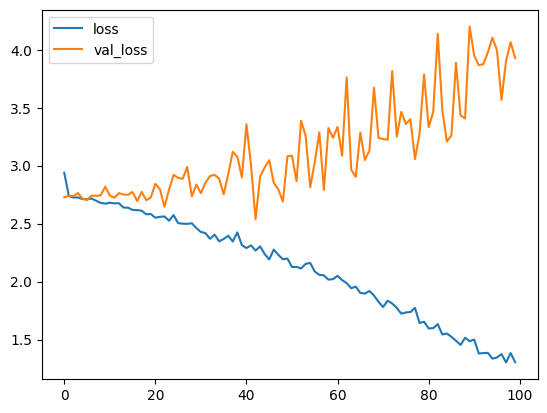

In [160]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()

In [162]:
import tensorflow as tf
import numpy as np
from PIL import Image

test_image_path = '/content/testimage4.png'  # Passe den Pfad zu deinem Testbild an

# Lade das Testbild und passe es an die Eingabeform des Modells an
test_image = Image.open(test_image_path)
test_image = test_image.resize((224, 224))  # Annahme: Das Modell erwartet eine Eingabe der Größe 224x224
test_image = np.array(test_image) / 255.0  # Normalisierung der Pixelwerte auf den Bereich [0, 1]
test_image = np.expand_dims(test_image, axis=0)  # Hinzufügen einer zusätzlichen Dimension für den Batch

# Mache eine Vorhersage mit dem Modell
predictions = model.predict(test_image)

# Interpretiere die Vorhersagen
predicted_class = np.argmax(predictions)
print('Vorhersage:', predicted_class)


1/1 [==============================] - 0s 192ms/step
Vorhersage: 6



1.  Grass
2.  Water
3.  Fire
4.  Rock
5.  Poison
6.  Ground
7.  Steel
8.  Electric
9.  Ice
10. Dark
11. Flying
12. Bug
13. Fighting
14. Psychic
15. Ghost
16. Dragon
17. Fairy

### Defining Layers

### Training

## Model Training

For the classification of Pokémon images, we will employ a Convolutional Neural Network (CNN). CNNs are particularly well-suited for detecting visual patterns in images. We will train the CNN model using the training dataset. During the training process, the model's weights will be adjusted to learn the visual features of the different Pokémon.

## Model Evaluation

Once the model has been trained, it is crucial to assess its performance. We will test the trained model on the